In [ ]:
"""
11/23
Purpose: To analyze the fashion dataset using tree based methods

"""

In [16]:
%load_ext autoreload
%autoreload 2

In [ ]:
#!git clone https://github.com/celiibrendan/fashion-mnist.git

In [13]:
from os import sys
sys.path.append("/fashion-mnist/utils/")
sys.path.append("../../../machine_learning_tools/")

In [18]:
import sklearn_models as sklm
import sklearn_utils as sklu

# loads the fashion dataset

In [3]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('/fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('/fashion-mnist/data/fashion', kind='t10k')

In [5]:
X_train.shape

(60000, 784)

In [7]:
import numpy as np
np.sqrt(784)

28.0

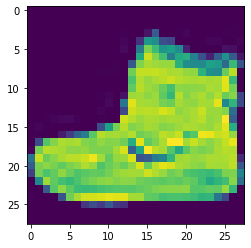

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28,28))

# Part A: Comparing different tree methods

In [87]:
 """
Purpose:  
Loss Functions. Compare and contrast trees, bagging, and Random Forests using 
the Gini indexverses the cross entropy loss. Which performs better? Why?

Pseudocode: 
For each model
1) Define a parameter space to search over
    Iterating over the parameter space:
        Iterate over Gini and Cross Entropy loss:
            Train the model
            Test the model
            Save the score (can plot them later)
            
"""

'\nPurpose:  \nLoss Functions. Compare and contrast trees, bagging, and Random Forests using \nthe Gini indexverses the cross entropy loss. Which performs better? Why?\n\nPseudocode: \nFor each model\n1) Define a parameter space to search over\n   Iterating over the parameter space:\n       Iterate over Gini and Cross Entropy loss:\n           Train the model\n           Test the model\n           Save the score (can plot them later)\n           \n'

In [116]:
clf_dict_options = dict(
# DecisionTreeClassifier = 
#     dict(
#     model = sklm.DecisionTreeClassifier,
#     parameters = dict(
#         max_depth = [1,3,5,7,10],
#         random_state = 10,
        
#     ),
#     results = None
#     ),
BaggingClassifier = 
        dict(
    model = sklm.BaggingClassifier,
    parameters = dict(
        n_estimators = [10,20],
        max_samples = [0.5,1.0],
        random_state = 10,
        
    ),
    tree_parameters = dict(
        max_depth = [1,10],
    ),
    results = None
    ),
    
RandomForestClassifier = 
        dict(
    model = sklm.RandomForestClassifier,
    parameters = dict(
        n_estimators = [10,20],
        max_samples = [0.5,1.0],
        random_state = 10,
        
    ),
    tree_parameters = dict(
        max_depth = [1,10],
    ),
    results = None
    ),

)

In [ ]:
import pandas as pd
import general_utils as gu
verbose = True

for clf_name,clf_dict in clf_dict_options.items():
    clf_df_dicts = []
    if verbose:
        print(f"clf_name= {clf_name}")
    clf_func = clf_dict["model"]
    clf_param_dict = clf_dict["parameters"].copy()
    all_param_comb = nu.all_choose_1_combinations_form_dict_values(clf_param_dict,
                                          verbose = True)
    for i,p in enumerate(all_param_comb):
        if verbose:
            print(f"Working on param {i+1}/{len(all_param_comb)}")
        for criterion in ["gini","entropy"]:
            if "tree_parameters" in clf_dict.keys():
                clf_param_dict_tree = clf_dict["tree_parameters"].copy()
                all_param_comb_tree = nu.all_choose_1_combinations_form_dict_values(clf_param_dict_tree,
                                          verbose = True)
                for ii,p_tree in enumerate(all_param_comb_tree):
                    if verbose:
                        print(f"     Working on tree param {ii+1}/{len(all_param_comb_tree)}")
                    tree_clf = sklm.DecisionTreeClassifier(criterion=criterion,
                                                          **p_tree)
                    clf = clf_func(base_estimator=tree_clf)
                    clf.fit(X_train,y_train)
                    clf_score = sklu.accuracy(clf,X_test,y_test)
                    curr_dict = dict(name=clf_name,
                            criterion=criterion,
                            score = clf_score,
                            **p)
                    clf_df_dicts.append(gu.merge_dicts([curr_dict,p_tree]))
                    
            else:
                clf = clf_func(criterion=criterion,**p)
                clf.fit(X_train,y_train)
                clf_score = sklu.accuracy(clf,X_test,y_test)
                curr_dict = dict(name=clf_name,
                            criterion=criterion,
                            score = clf_score,
                            **p)
                clf_df_dicts.append(curr_dict)
    clf_df = pd.DataFrame.from_records(clf_df_dicts)
    clf_dict["results"] = clf_df

clf_name= BaggingClassifier
# of combinations = 4
Working on param 1/4
# of combinations = 2
     Working on tree param 1/2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


     Working on tree param 2/2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


# of combinations = 2
     Working on tree param 1/2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


     Working on tree param 2/2


In [85]:
import sklearn_models as sklm

In [86]:
classifiers = [
    sklm.DecisionTreeClassifier,
    sklm.BaggingClassifier,
    sklm.RandomForestClassifier,
    sklm.AdaBoostClassifier,
    sklm.GradientBoostingClassifier,
]
classifiers

[<function sklearn_models.DecisionTreeClassifier(splitter='best', criterion='gini', max_depth=None, max_features=None, random_state=None, class_weight=None, **kwargs)>,
 <function sklearn_models.BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, random_state=True, verbose=True, **kwargss)>,
 <function sklearn_models.RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=None, max_features='auto', bootstrap=True, oob_score=True, random_state=None, verbose=False, max_samples=None, class_weight=None, **kwargs)>,
 <function sklearn_models.AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, random_state=None, **kwargs)>,
 <function sklearn_models.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, max_depth=3, random_state=None, max_features=None, verbose=0)>]

# Random Classifier

In [84]:
from importlib import reload
sklm = reload(sklm)
sklm.RandomForestClassifier.__doc__

"\n    RandomForrest parameters: \n    n_estimators: number o trees to use in the forest\n    criterion : how the best split is determined\n    - 'gini'\n    - 'entropy'\n    max_depth: int , max depth of trees\n    max_features: number of features to look at when doing best split\n    - 'auto':sqrt of number of n_features\n    - 'sqrt'\n    - log2\n    - int: specifying the exact numbe of features\n    - float: secifying the percentage of total n_features\n    - None: always has maximum number of features\n\n    bootstrap: bool(True): whether bootstrap sapling are used to build trees\n    (if not then the whole dataset is used)\n\n    oob_score: bool (False): whether to use out-of =-bag samples to estimate the generalization\n    score\n\n    random_state:int  controls the randomness of boostrabbing and feature filtering\n\n    verbose: bool\n    max_samples: Number of samples to draw if doing bootstrapping\n    \n    \n    Example: \n    clf = sklm.RandomForestClassifier(max_depth=5)

In [63]:
clf_for = sklm.RandomForestClassifier(max_depth=5)
clf_for.fit(X_train,y_train)
print(sklu.accuracy(clf_for,X_test,y_test),clf_for.oob_score_)
_ = sklm.feature_importance(clf_for,return_std=True,plot=True)

0.7681 0.76665


In [51]:
clf = sklm.tree.DecisionTreeClassifier(max_depth = 10)
clf.fit(X_train,y_train)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'oob_score_'

Using method: permutation
Time for importances = 15.339240550994873


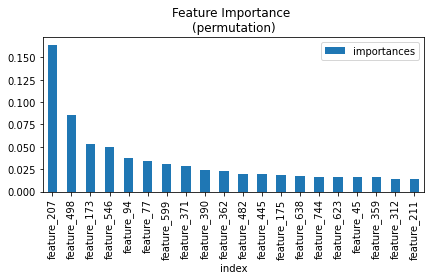

array([ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  3.400e-03,  5.000e-03,
        8.000e-04,  1.000e-04,  8.000e-04,  0.000e+00,  0.000e+00,
        1.000e-04,  0.000e+00,  4.000e-04,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  8.000e-04,  0.000e+00,  0.000e+00,  0.000e+00,
       -1.000e-04,  0.000e+00,  1.140e-02,  7.600e-03,  5.800e-03,
        1.300e-03,  0.000e+00,  0.000e+00,  2.300e-03,  3.000e-04,
        1.580e-02,  3.000e-03,  1.300e-03,  0.000e+00,  0.000e+00,
        2.000e-04,  1.000e-04,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  7.900e-03,  6.500e-03,
        0.000e+00,  1.800e-03,  2.000e-04,  0.000e+00,  2.000e-04,
        1.180e-02,  2.000e-04,  0.000e+00,  0.000e+00,  2.000e

In [76]:
sklm.feature_importances(clf,
                        method="permutation",
                        verbose = True,
                        plot=True,
                        X_permuation=X_test,
                        y_permutation=y_test,
                        n_repeats=1)

Using method: impurity_decrease
Time for importances = 0.0009531974792480469


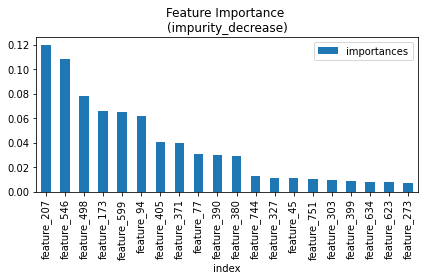

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.39526958e-03, 1.49249912e-04, 8.38090699e-04,
       1.58218185e-04, 1.08025063e-03, 0.00000000e+00, 0.00000000e+00,
       1.02849480e-04, 0.00000000e+00, 1.37400203e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.55910308e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.49684350e-04,
       0.00000000e+00, 1.90884292e-03, 4.92954861e-03, 8.46365583e-04,
       1.40834673e-04, 5.09675683e-04, 0.00000000e+00, 1.23211249e-03,
       4.22002388e-04, 1.08272793e-02, 2.74526218e-03, 1.54259489e-03,
       4.61487914e-05, 2.45165454e-05, 1.50690731e-04, 9.25161571e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [77]:
sklm.feature_importances(clf,
                        #method=,
                        verbose = True,
                        plot=True,
                        X_permuation=X_test,
                        y_permutation=y_test,
                        n_repeats=1)

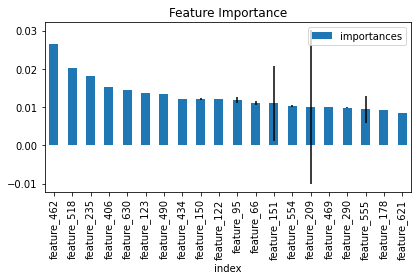

In [64]:
def plot_feature_importance(clf,
                            feature_names = None,
                           sort_features=True,
                           n_features_to_plot=20,
                           title="Feature Importance"):
    """
    Purpose: Will plot the feature importance of a classifier
    """
    importances = np.array(clf.feature_importances_)
        
    if feature_names is None:
        feature_names= np.array([f"feature_{i}" for i in range(len(importances))])
    
    if sort_features:
        sort_idx = np.flip(np.argsort(importances))
        importances = importances[sort_idx]
        feature_names = feature_names[sort_idx]
    
    if not sklm.is_ensemble(clf):
            std = np.zeros(len(importances))
    else:
        std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
        
    df = pd.DataFrame(dict(importances=importances,index=feature_names,std=std))
    
    #doing the filtering of the features
    if n_features_to_plot is not None and len(df)>n_features_to_plot:
        df = df.iloc[:n_features_to_plot,:]

    #doing the plotting
    fig,ax = plt.subplots()
    df.plot.bar(x="index",y="importances",yerr="std",ax=ax)
    ax.set_title(title)
    fig.tight_layout()
    
plot_feature_importance(clf_for)

In [53]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt


def feature_importance_std(clf):
    if not sklm.is_ensemble(clf):
        std = np.zeros(len(clf.feature_importances_))
    else:
        std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
    return std
def feature_importance(
    clf,
    verbose = True,
    plot = False,
    feature_names = None,
    return_std = False,
    **kwargs
    ):
    """
    Purpose: Will return the feature importance
    of a tree based classi
    
    """

    st = time.time()
    importances = clf.feature_importances_
    
    elapsed_time = time.time() - st
    if verbose:
        print(f"Time for importances = {elapsed_time}")

    if return_std:
        std = feature_importance_std(clf)
        
    if plot:
        plot_feature_importance(clf,feature_names,**kwargs)
    
    if return_std:
        return importances,std
    else:
        return importances

In [38]:
feature_importance(clf,plot=True)


,importances,index,std
0,0.000000,feature_0,0.000000
1,0.000000,feature_1,0.000000
2,0.000000,feature_2,0.000000
3,0.000000,feature_3,0.000000
4,0.000000,feature_4,0.000000
5,0.000000,feature_5,0.000000
6,0.000000,feature_6,0.000000
7,0.000000,feature_7,0.000000
8,0.000090,feature_8,0.000485
9,0.000147,feature_9,0.000648


In [ ]:
"""
BaggingClassifer parameters: 


"""

In [12]:
ensemble.RandomForestClassifier.__doc__

'\n    A random forest classifier.\n\n    A random forest is a meta estimator that fits a number of decision tree\n    classifiers on various sub-samples of the dataset and uses averaging to\n    improve the predictive accuracy and control over-fitting.\n    The sub-sample size is controlled with the `max_samples` parameter if\n    `bootstrap=True` (default), otherwise the whole dataset is used to build\n    each tree.\n\n    Read more in the :ref:`User Guide <forest>`.\n\n    Parameters\n    ----------\n    n_estimators : int, default=100\n        The number of trees in the forest.\n\n        .. versionchanged:: 0.22\n           The default value of ``n_estimators`` changed from 10 to 100\n           in 0.22.\n\n    criterion : {"gini", "entropy"}, default="gini"\n        The function to measure the quality of a split. Supported criteria are\n        "gini" for the Gini impurity and "entropy" for the information gain.\n        Note: this parameter is tree-specific.\n\n    max_depth : 

In [ ]:

models = [
    DecisionTreeClassifier(max_depth=max_depth),
    RandomForestClassifier(n_estimators=n_trees, max_features=n_features, max_depth=max_depth),
    ExtraTreesClassifier(  n_estimators=n_trees, max_features=n_features, max_depth=max_depth),
    AdaBoostClassifier( DecisionTreeClassifier(max_depth=max_depth), n_estimators=n_trees, ),
]